In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
data = pd.read_csv("/Users/mohamedeldagla/Desktop/senior year/New Trends in AI/Epilepsy - GANs/Data/Epileptic Seizure Recognition.csv")
pd.set_option('display.max_columns', None)
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,25,19,6,9,21,13,-37,-58,-33,5,47,80,101,88,73,69,41,-13,-31,-61,-80,-77,-66,-43,5,87,129,121,88,12,-76,-150,-207,-186,-165,-148,-103,-33,40,94,75,8,-81,-155,-227,-262,-233,-218,-187,-126,-65,-12,27,61,49,9,-46,-124,-210,-281,-265,-181,-89,-4,53,53,38,43,31,34,9,-7,-34,-70,-84,-101,-70,-11,42,62,66,74,64,59,56,36,-11,-30,-43,-23,8,42,77,103,135,121,79,59,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,309,309,303,297,295,295,293,286,279,283,301,308,285,252,215,194,169,111,-74,-388,-679,-892,-949,-972,-1001,-1006,-949,-847,-668,-432,-153,72,226,326,392,461,495,513,511,496,479,453,440,427,414,399,385,385,404,432,444,437,418,392,373,363,365,372,385,388,383,371,360,353,334,303,252,200,153,151,143,48,-206,-548,-859,-1067,-1069,-957,-780,-597,-460,-357,-276,-224,-210,-350,-930,-1413,-1716,-1360,-662,-96,243,323,241,29,-167,-228,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,-82,-57,-38,-40,-36,-31,-13,11,19,9,-20,-48,-71,-71,-57,-32,-13,6,29,27,25,10,-7,-36,-47,-37,-36,-22,-32,-38,-55,-61,-64,-72,-67,-53,-25,-10,-4,-23,-55,-93,-102,-106,-101,-69,-45,-42,-57,-64,-77,-80,-77,-78,-56,-34,-5,10,5,-5,-44,-75,-99,-110,-104,-103,-94,-105,-108,-110,-99,-89,-82,-76,-80,-90,-106,-106,-108,-87,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,-67,-66,-58,-54,-56,-70,-80,-82,-85,-74,-70,-71,-82,-88,-93,-97,-89,-87,-83,-70,-50,-37,-31,-32,-39,-54,-64,-68,-67,-69,-63,-60,-63,-55,-43,-37,-27,-31,-35,-47,-58,-63,-74,-73,-67,-60,-56,-49,-46,-57,-58,-62,-63,-63,-61,-56,-65,-62,-57,-61,-63,-66,-69,-86,-89,-86,-83,-87,-80,-69,-62,-57,-60,-60,-68,-58,-53,-57,-66,-66,-73,-78,-73,-84,-92,-97,-88,-81,-72,-61,-66,-72,-88,-90,-88,-77,-58,-53,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,16,14,-14,-42,-56,-45,-45,-45,-38,-47,-45,-37,-3,23,39,27,0,-28,-44,-37,-22,5,30,31,6,-32,-27,-27,2,13,-6,-29,-41,-22,-13,-16,-31,-52,-60,-40,-16,0,14,24,36,39,3

In [3]:
data.shape

(11500, 180)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [5]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,-6.964087,-5.773826,-4.700783,-4.143826,-4.546087,-5.53200,-6.670435,-7.702348,-7.894696,-8.081391,-7.818174,-7.693913,-7.210783,-6.653391,-6.18313,-5.978174,-6.606696,-7.999043,-9.597826,-11.028435,-11.366522,-10.922261,-9.660696,-8.282957,-7.091217,-6.071217,-5.658087,-5.486609,-5.893304,-5.861826,-5.894087,-5.659739,-5.935130,-6.492174,-7.022435,-7.327739,-7.302174,-7.186174,-7.415304,-8.219043,-9.350783,-10.321043,-10.856348,-10.670870,-10.559217,-10.128957,-9.481565,-8.837

In [6]:
data.isna().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [8]:
data.drop(columns=['Unnamed'],inplace=True)

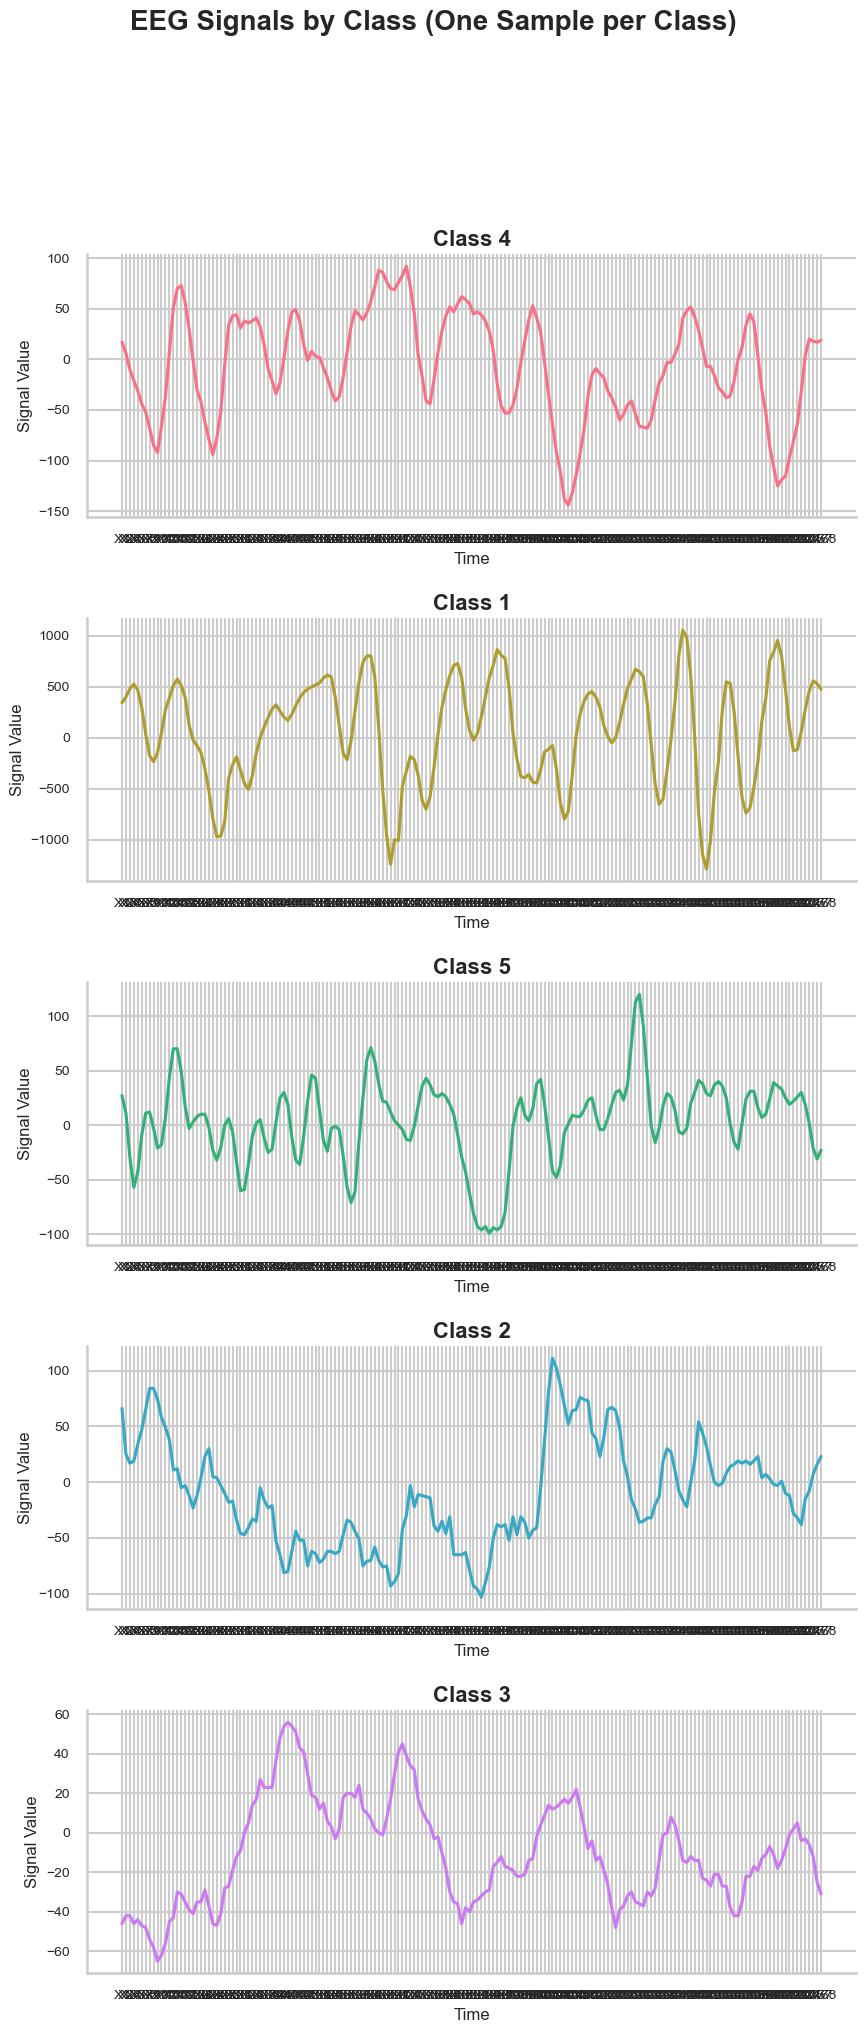

In [9]:
sns.set_theme(style="whitegrid", context="talk")

unique_classes = data['y'].unique()

fig, axes = plt.subplots(nrows=len(unique_classes), ncols=1, figsize=(9, 4 * len(unique_classes)))
fig.suptitle('EEG Signals by Class (One Sample per Class)', fontsize=20, fontweight='bold', y=1.02)

for i, class_label in enumerate(unique_classes):
    class_data = data[data['y'] == class_label]

    random_sample = class_data.sample(n=1).drop(columns='y')  # Exclude the 'y' column

    signal_data = random_sample.melt(var_name='Time', value_name='Signal Value')
    sns.lineplot(
        data=signal_data,
        x='Time',
        y='Signal Value',
        ax=axes[i],
        color=sns.color_palette("husl", len(unique_classes))[i],  # Distinct color for each class
    )

    axes[i].set_title(f'Class {class_label}', fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Signal Value', fontsize=12)
    axes[i].set_xlabel('Time', fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
sns.despine()

plt.show()

In [10]:
data['y'].value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

In [11]:
X = data.drop("y",axis=1)
y = data['y']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)


X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

In [13]:
X_train.shape

(9200, 1, 178)

In [14]:
model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(1, 178)), 
    LSTM(128, activation='relu', return_sequences=True),
    LSTM(64, activation='relu', return_sequences=True),
    LSTM(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │       157,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 375,685 (1.43 MB)

 Trainable params: 375,685 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Check unique values in y_train and y_test
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))


Unique values in y_train: [1 2 3 4 5]
Unique values in y_test: [1 2 3 4 5]


In [18]:
y_train = y_train - 1
y_test = y_test - 1

In [19]:
from tensorflow.keras.utils import to_categorical

# Convert target labels to categorical for 5 classes
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

# Fit the model with updated categorical labels
history = model.fit(X_train, y_train, epochs=25, batch_size=65, validation_data=(X_test, y_test))


Epoch 1/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2773 - loss: 1.4958 - val_accuracy: 0.4239 - val_loss: 1.2897
Epoch 2/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4521 - loss: 1.2471 - val_accuracy: 0.4591 - val_loss: 1.1906
Epoch 3/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4922 - loss: 1.1407 - val_accuracy: 0.4983 - val_loss: 1.1137
Epoch 4/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5264 - loss: 1.0598 - val_accuracy: 0.5017 - val_loss: 1.0871
Epoch 5/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5582 - loss: 0.9784 - val_accuracy: 0.5291 - val_loss: 1.0464
Epoch 6/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5759 - loss: 0.9459 - val_accuracy: 0.5335 - val_loss: 1.0131
Epoch 7/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6067 - loss: 0.8825 - val_accuracy: 0.5552 - val_loss: 0.9982
Epoch 8/25
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6216 - loss: 0.8521 - val_accuracy: 0.

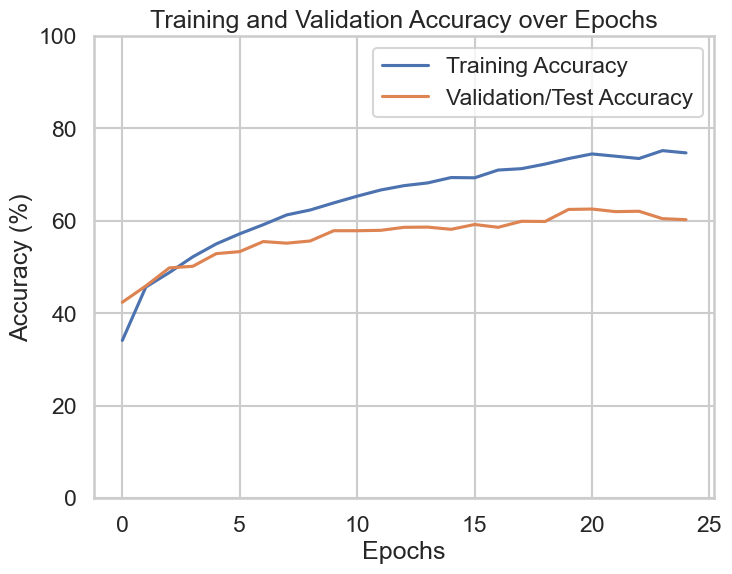

In [20]:
import matplotlib.pyplot as plt

# Convert accuracy to percentage and plot
plt.figure(figsize=(8, 6))

# Plot training and validation accuracy as percentages
plt.plot([x * 100 for x in history.history['accuracy']], label='Training Accuracy')
plt.plot([x * 100 for x in history.history['val_accuracy']], label='Validation/Test Accuracy')

# Set title and labels
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')

# Set y-axis limits from 0 to 100
plt.ylim(0, 100)

# Add legend
plt.legend()

# Display the plot
plt.show()

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


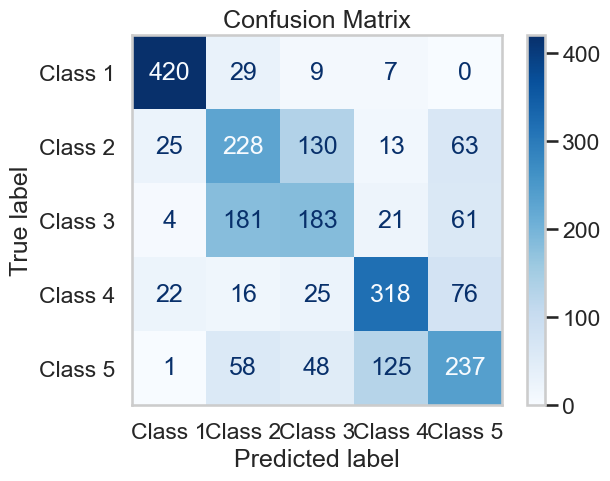

              precision    recall  f1-score   support

     Class 1       0.89      0.90      0.90       465
     Class 2       0.45      0.50      0.47       459
     Class 3       0.46      0.41      0.43       450
     Class 4       0.66      0.70      0.68       457
     Class 5       0.54      0.51      0.52       469

    accuracy                           0.60      2300
   macro avg       0.60      0.60      0.60      2300
weighted avg       0.60      0.60      0.60      2300



In [22]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Get predictions from the model
y_pred_prob2 = model.predict(X_test)  # Get probabilities
y_pred = np.argmax(y_pred_prob2, axis=1)  # Convert to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot-encoded true labels to class labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
disp.plot(cmap=plt.cm.Blues)
plt.grid(False) 
plt.title("Confusion Matrix")
plt.show()

# Generate and print the classification report
report = classification_report(y_true, y_pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
print(report)
